In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib notebook

In [2]:
# Create a reference the CSV file desired
csv_path = "clean_houston_data.csv"

# Read the CSV into a Pandas DataFrame
houston_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
houston_df.head()

,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902


In [3]:
# Breakdown by city

clean_df = houston_df.loc[houston_df['Location City'] != 'HOUSTON N']
clean_df['Location City'].value_counts()


HOUSTON          310252
KATY              18123
SUGAR LAND        12885
PEARLAND           9065
PASADENA           8574
CYPRESS            8420
LEAGUE CITY        5213
SOUTH HOUSTON      1514
Name: Location City, dtype: int64

In [ ]:
#Export clean_df to csv
#clean_df.to_csv('clean_houston_data.csv',index=False)

In [4]:
#Determine the mean of the individual receipt types
pd.options.display.float_format = '${:,.2f}'.format
liquor_df = clean_df.groupby('Location City', as_index=False)['Liquor Receipts'].mean()
liquor_df.sort_values(by=['Liquor Receipts'])


,Location City,Liquor Receipts
6,SOUTH HOUSTON,"$5,469.92"
4,PASADENA,"$12,418.68"
5,PEARLAND,"$14,065.85"
0,CYPRESS,"$14,840.85"
3,LEAGUE CITY,"$15,534.43"
2,KATY,"$16,145.23"
7,SUGAR LAND,"$18,173.24"
1,HOUSTON,"$20,774.75"


<IPython.core.display.Javascript object>


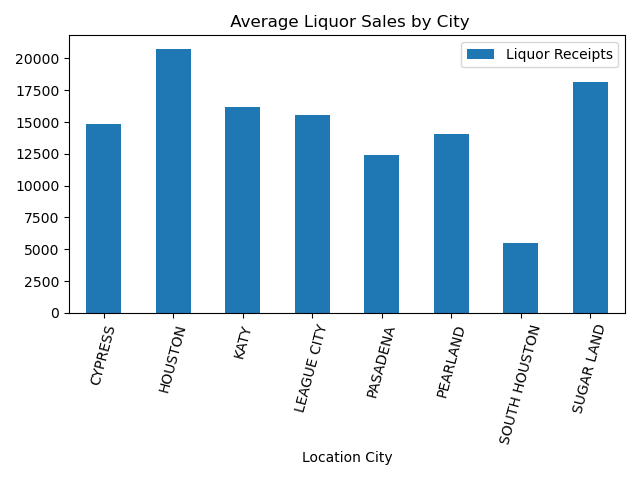

In [16]:
#Plot Liquor Receipts by City
pd.options.display.float_format = '${:,.2f}'.format
liquor_df.plot.bar(x="Location City", y="Liquor Receipts", rot=75, title=" Average Liquor Sales by City")
plt.tight_layout()

In [7]:
#Determine the mean of the individual receipt types
pd.options.display.float_format = '${:,.2f}'.format
wine_df = clean_df.groupby('Location City', as_index=False)['Wine Receipts'].mean()
wine_df.sort_values(by=['Wine Receipts'])

,Location City,Wine Receipts
6,SOUTH HOUSTON,$74.26
4,PASADENA,$737.87
3,LEAGUE CITY,"$1,964.48"
5,PEARLAND,"$2,740.41"
0,CYPRESS,"$2,981.80"
2,KATY,"$3,799.41"
7,SUGAR LAND,"$6,454.85"
1,HOUSTON,"$8,819.39"


<IPython.core.display.Javascript object>


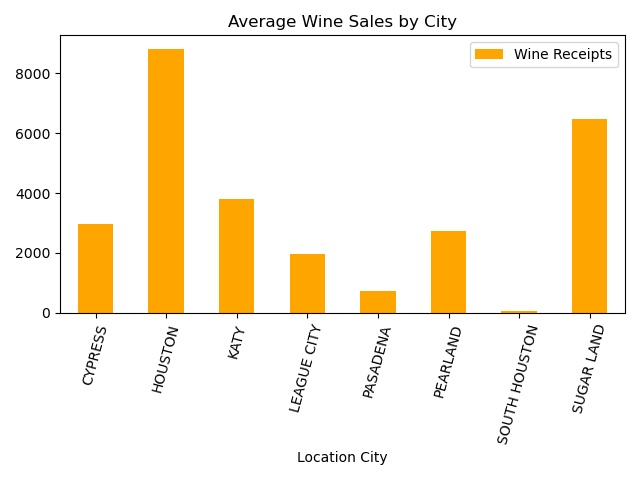

In [17]:
#Plot Wine Receipts by City
pd.options.display.float_format = '${:,.2f}'.format
wine_df.plot.bar(x="Location City", y="Wine Receipts", rot=75, title="Average Wine Sales by City",color='orange')
plt.tight_layout()

In [9]:
#Determine the mean of the individual receipt types
pd.options.display.float_format = '${:,.2f}'.format
beer_df = clean_df.groupby('Location City', as_index=False)['Beer Receipts'].mean()
beer_df.sort_values(by=['Beer Receipts'])

,Location City,Beer Receipts
5,PEARLAND,"$7,642.50"
3,LEAGUE CITY,"$9,532.02"
6,SOUTH HOUSTON,"$9,940.32"
0,CYPRESS,"$10,407.04"
4,PASADENA,"$10,859.26"
7,SUGAR LAND,"$10,905.61"
2,KATY,"$11,023.39"
1,HOUSTON,"$11,856.18"


<IPython.core.display.Javascript object>


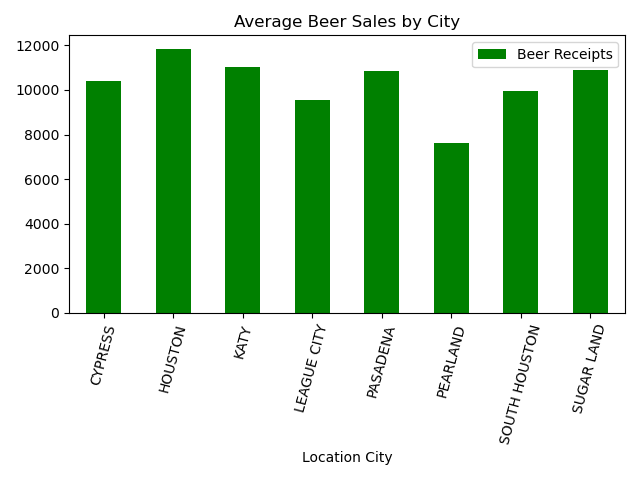

In [10]:
#Plot Beer Receipts by City

beer_df.plot.bar(x="Location City", y="Beer Receipts", rot=75, title="Average Beer Sales by City",color='green')
plt.tight_layout()

In [11]:
#Create a new summary dataframe
pd.options.display.float_format = '${:,.2f}'.format
babysteps_df = pd.merge(liquor_df, wine_df, on="Location City")
babysteps_df

,Location City,Liquor Receipts,Wine Receipts
0,CYPRESS,"$14,840.85","$2,981.80"
1,HOUSTON,"$20,774.75","$8,819.39"
2,KATY,"$16,145.23","$3,799.41"
3,LEAGUE CITY,"$15,534.43","$1,964.48"
4,PASADENA,"$12,418.68",$737.87
5,PEARLAND,"$14,065.85","$2,740.41"
6,SOUTH HOUSTON,"$5,469.92",$74.26
7,SUGAR LAND,"$18,173.24","$6,454.85"


In [12]:
pd.options.display.float_format = '${:,.2f}'.format
avg_df = pd.merge(babysteps_df, beer_df, on="Location City")
avg_df


,Location City,Liquor Receipts,Wine Receipts,Beer Receipts
0,CYPRESS,"$14,840.85","$2,981.80","$10,407.04"
1,HOUSTON,"$20,774.75","$8,819.39","$11,856.18"
2,KATY,"$16,145.23","$3,799.41","$11,023.39"
3,LEAGUE CITY,"$15,534.43","$1,964.48","$9,532.02"
4,PASADENA,"$12,418.68",$737.87,"$10,859.26"
5,PEARLAND,"$14,065.85","$2,740.41","$7,642.50"
6,SOUTH HOUSTON,"$5,469.92",$74.26,"$9,940.32"
7,SUGAR LAND,"$18,173.24","$6,454.85","$10,905.61"


In [13]:

pd.options.display.float_format = '${:,.2f}'.format
avg_df.sort_values('Liquor Receipts',ascending=False).head(8)

,Location City,Liquor Receipts,Wine Receipts,Beer Receipts
1,HOUSTON,"$20,774.75","$8,819.39","$11,856.18"
7,SUGAR LAND,"$18,173.24","$6,454.85","$10,905.61"
2,KATY,"$16,145.23","$3,799.41","$11,023.39"
3,LEAGUE CITY,"$15,534.43","$1,964.48","$9,532.02"
0,CYPRESS,"$14,840.85","$2,981.80","$10,407.04"
5,PEARLAND,"$14,065.85","$2,740.41","$7,642.50"
4,PASADENA,"$12,418.68",$737.87,"$10,859.26"
6,SOUTH HOUSTON,"$5,469.92",$74.26,"$9,940.32"


In [14]:
#Total Number of entities

total_count = len(clean_df["Location City"])
total_count

total_count_df = pd.DataFrame({"Total TABC Entities": [total_count]})
total_count_df

,Total TABC Entities
0,374046


<IPython.core.display.Javascript object>


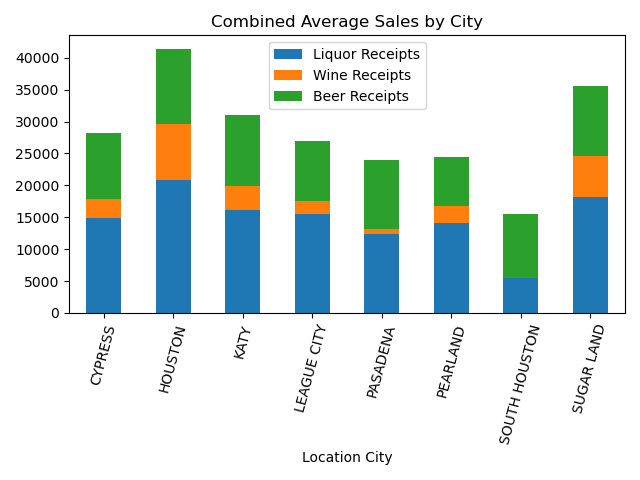

In [15]:

avg_df.plot.bar(x="Location City",stacked=True,rot=75, title="Combined Average Sales by City")
plt.tight_layout()